<a href="https://colab.research.google.com/github/envomp/2020-Text-Mining/blob/master/week1/Verb_assets_in_different_decades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install conllu estnltk==1.6.7b0
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

Esmalt loeb failid listi ning viib nad paremini käideltatavale kujule

In [ ]:
from estnltk import Text
from html import unescape

sample_data = [
    ("1890", "1890.txt", "AJA1890\epo0101"),
    ("1930", "1930.txt", "ESMA\esma220"),
    ("1950", "1950.txt", "AJA1950\ed0001"),
    ("1990", "1999.txt", "AJAE1990\ee0032")
]

# encoding is cp1257 - aka windows1257 because I copied the files to here with that encoding
def formatted_data(filename, junk):
  return open(filename, "r", encoding="cp1257").read().replace(junk, "").strip()

texts = [
    (
      year, 
      Text(unescape(formatted_data(filename, junk)))
        .tag_layer("words")
        .tag_layer("morph_analysis")
    ) for year, filename, junk in sample_data
]

global_total_occurences = 0
global_guessed_right = 0

def get_percentage(text):
  global global_total_occurences
  global global_guessed_right
  total_occurences = 0
  guessed_right = 0
  for item in text.morph_analysis:
    if re.match(r".+[bB]$", item.text):
      global_total_occurences += 1
      total_occurences += 1
      if "V" in item.partofspeech:
        global_guessed_right += 1
        guessed_right += 1
      
  return round(100 * (guessed_right / total_occurences), 2)

[print(f"Aastal {year} oli {get_percentage(text)}% b-tähega lõppevad sõnad verbid.") for year, text in texts]
print(f"Aastate peale keskmiselt olid {round(100 * (global_guessed_right / global_total_occurences), 2)}% b-tähega lõppevad sõnad verbid.")

Iga faili kohta moodusta b-lõpuliste sõnade 15 kõige sagedasemat tekstisõnate

In [188]:
from collections import Counter
import re

def top_15_ends_with_b(data):
  return Counter([x.text for x in data if re.match(r".+[bB]$", x.text)]).most_common(15)

top_occurances = [
  (
    year,
    top_15_ends_with_b(text.words)
  ) for year, text in texts
]


Visualiseerime tulemused

INFO:font_manager.py:1337: generated new fontManager


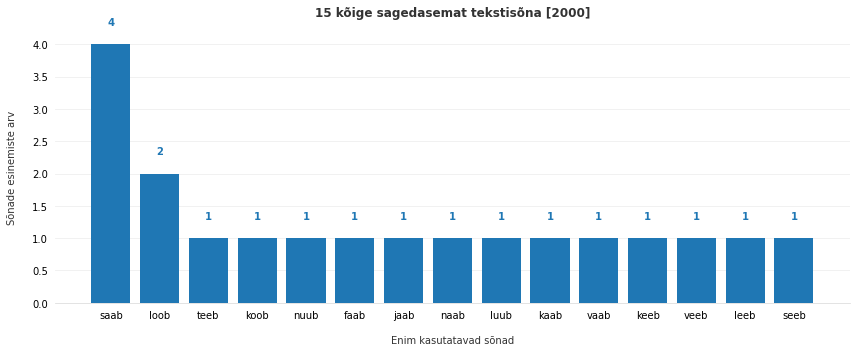

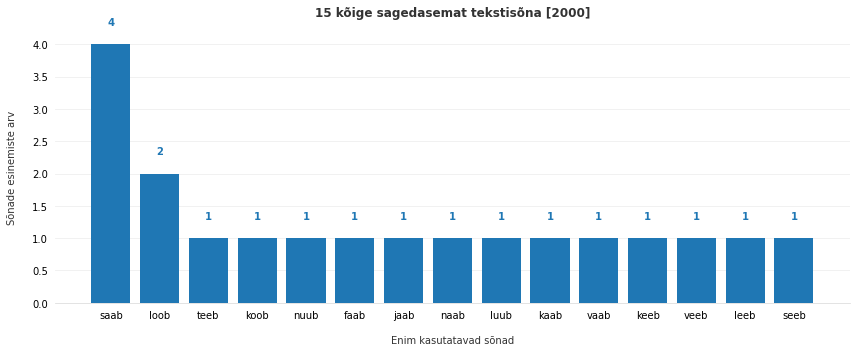

In [189]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.font_manager._rebuild()
mpl.rc('figure', figsize=(12, 5))

for year, result in top_occurances:
  # Use the newly integrated Roboto font family for all text.
  plt.rc('font', family='Open Sans')
  fig, ax = plt.subplots()

  # Save the chart so we can loop through the bars below.
  bars = ax.bar(
      x=[occurances[0] for occurances in result],
      height=[occurances[1] for occurances in result]
      # tick_label=mpg.index.strftime('%Y')
  )

  # Axis formatting.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)

  # Add text annotations to the top of the bars.
  bar_color = bars[0].get_facecolor()
  for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )

  # Add labels and a title.
  ax.set_xlabel('Enim kasutatavad sõnad', labelpad=15, color='#333333')
  ax.set_ylabel('Sõnade esinemiste arv', labelpad=15, color='#333333')
  ax.set_title(f'15 kõige sagedasemat tekstisõna [{year}]', pad=15, color='#333333',
              weight='bold')

  fig.tight_layout()